## Step 1: Import Libraries and Load Data
We start by importing pandas and loading the original dataset from CSV.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


# Load the raw data
df = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")
df.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


## Step 2: Convert Date Columns
We convert pickup and dropoff times to datetime format to allow time-based analysis.


In [1]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


NameError: name 'pd' is not defined

## Step 3: Feature Engineering
We'll create new columns:
- `trip_duration_min`: duration of the ride in minutes
- `month` and `day`: for time trend analysis


In [ ]:
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day'] = df['tpep_pickup_datetime'].dt.day


## Step 4: Data Cleaning
We'll filter out invalid rows such as:
- Zero or negative distances
- Unrealistic durations (over 3 hours)
- Negative fares or totals
- Passenger count = 0


In [ ]:
df_cleaned = df[
    (df['trip_distance'] > 0) &
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_duration_min'] > 0) &
    (df['trip_duration_min'] <= 180) &
    (df['trip_distance'] <= 50) &
    (df['fare_amount'] <= 500) &
    (df['passenger_count'] > 0)
].copy()
df_cleaned.shape


(22456, 21)

## Step 5: Export Cleaned Data
We’ll save the cleaned dataset as `cleaned_taxi_data.csv` to use in Tableau or future analysis.


In [ ]:
df_cleaned.to_csv("cleaned_taxi_data.csv", index=False)


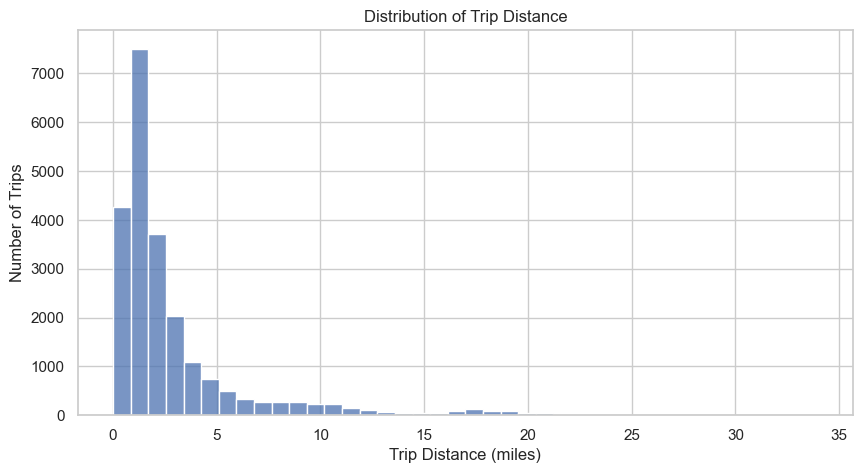

In [ ]:
# Histogram of trip distance
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned['trip_distance'], bins=40)
plt.title("Distribution of Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Number of Trips")
plt.show()


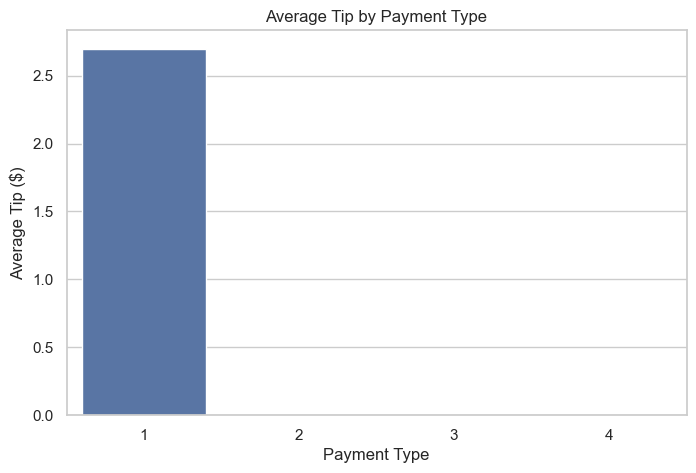

In [ ]:
 #Average tip by payment type

tip_by_payment = df_cleaned.groupby('payment_type')['tip_amount'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=tip_by_payment.index.astype(str), y=tip_by_payment.values)
plt.title("Average Tip by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Average Tip ($)")
plt.show()

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

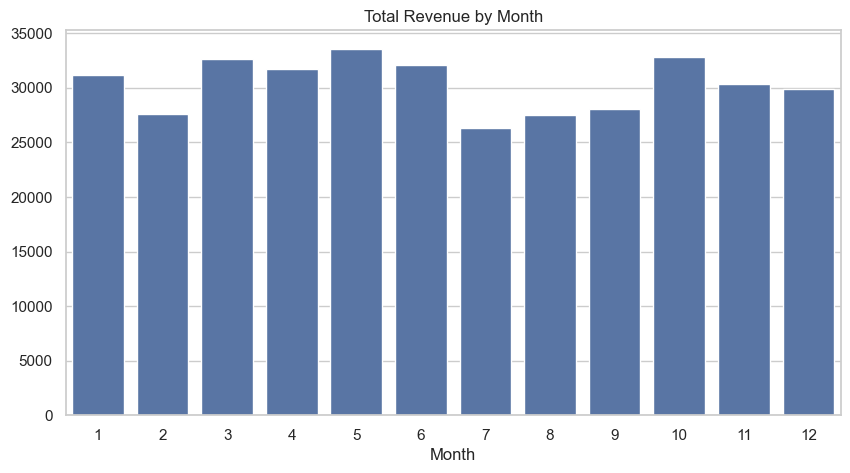

In [ ]:
#Total revenue by month
monthly_revenue = df_cleaned.groupby('month')['total_amount'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title("Total Revenue by Month")
plt.xlabel("Month")
plt.ylabel


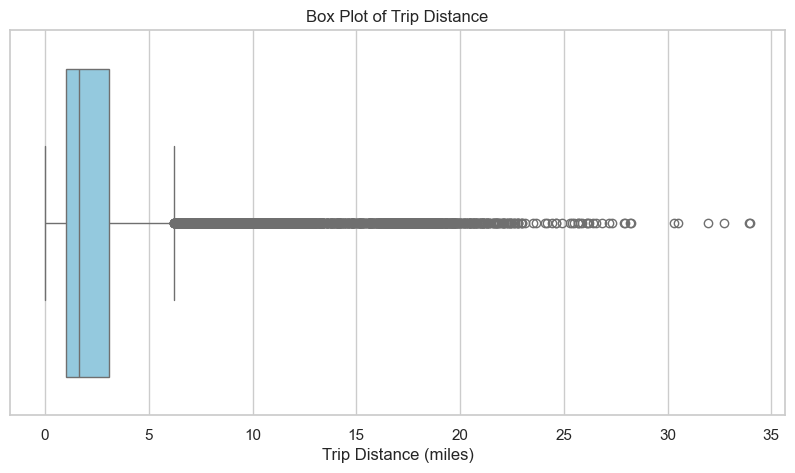

In [ ]:

# Create a box plot of trip_distance
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['trip_distance'], color='skyblue')
plt.title('Box Plot of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.show()

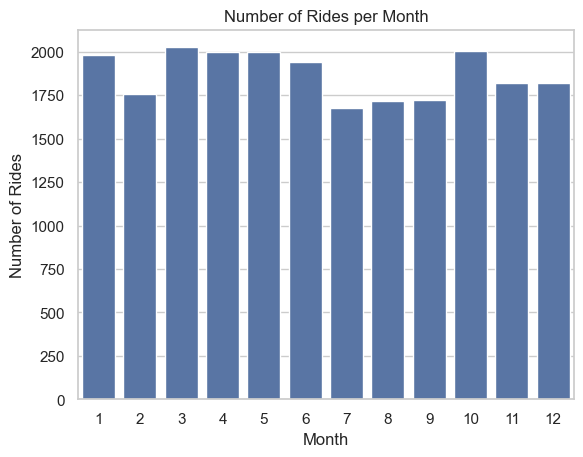

In [ ]:
# Total Rides by Month
monthly_rides = df_cleaned['month'].value_counts().sort_index()
sns.barplot(x=monthly_rides.index, y=monthly_rides.values)
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()

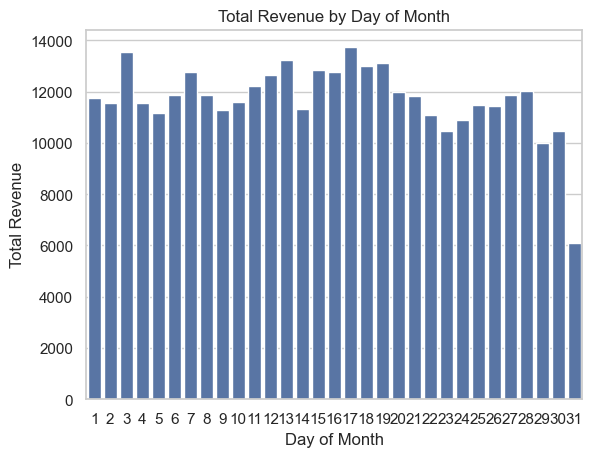

In [ ]:
#Total Revenue by Day of Month
daily_revenue = df_cleaned.groupby('day')['total_amount'].sum()
sns.barplot(x=daily_revenue.index, y=daily_revenue.values)
plt.title('Total Revenue by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Total Revenue')
plt.show()

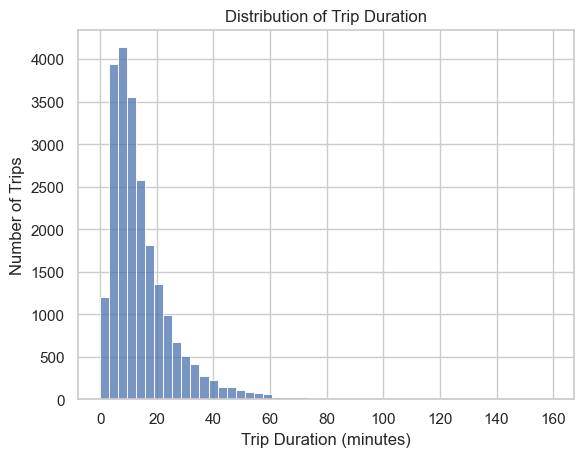

In [ ]:
# Histogram of Trip Duration
sns.histplot(df_cleaned['trip_duration_min'], bins=50)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Number of Trips')
plt.show()  # Display the plot

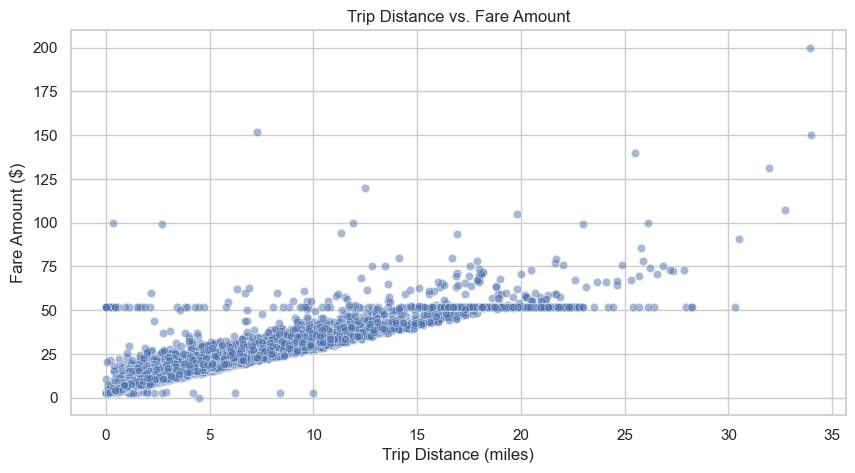

In [ ]:
# Trip Distance vs. Fare (Scatter Plot)
plt.figure(figsize=(10, 5))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_cleaned, alpha=0.5)
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()  # Display the plot


## Why We Removed Trips with `trip_distance = 0.0`

During the data cleaning process, we filtered out all rows where `trip_distance` was less than or equal to 0. These entries were excluded for the following reasons:

- **Possible Canceled or Error Trips**: A distance of `0.0` may indicate a trip was canceled, misrecorded, or had a GPS failure.
- **Non-Meaningful for EDA**: These records do not represent meaningful taxi rides and would distort our analysis of distance, duration, and fare distributions.
- **Skewing Averages**: Keeping zero-distance rides would artificially lower metrics such as average trip distance and fare amount, leading to misleading conclusions.
- **Business Use Case Alignment**: Our goal is to analyze real, completed trips to inform operational decisions — not to detect anomalies or cancellations.

These entries could be useful in a separate fraud or operational failure analysis, but for this exploratory analysis, removing them improves clarity and reliability.
